In [19]:
import pandas as pd
import numpy as np

In [ ]:
#ich checke noch nicht in welcher Form die Daten ins SVR müssen

In [123]:
df= pd.read_pickle('top100comunio.pckle')
X=df[["Tore","Punkte","Einsätze"]]
y=df['Marktwert']

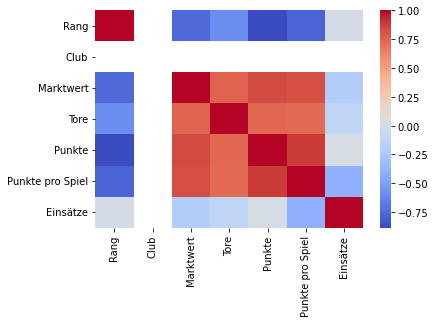

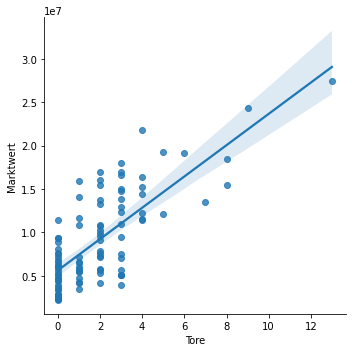

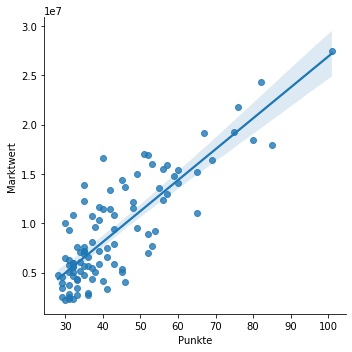

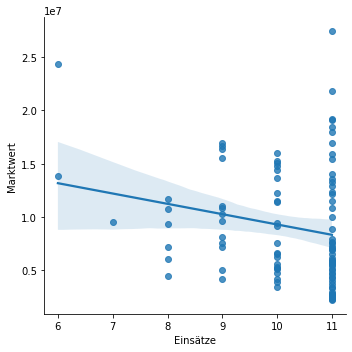

In [127]:
import seaborn as sns

plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


sns.lmplot(x='Tore',y='Marktwert',data=df)
sns.lmplot(x='Punkte',y='Marktwert',data=df)
sns.lmplot(x='Einsätze',y='Marktwert',data=df)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [113]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

dataX=df.iloc[:,6:8+10].values.astype(float)
dataY=df.iloc[:,4:5].values.astype(float)
## Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(dataX)
y = sc_y.fit_transform(dataY)

#X=X.ravel()
y=y.ravel()

In [114]:
regr = SVR(kernel='rbf')
regr.fit(X, y)

SVR()

In [116]:
## Ausprobieren 
valData=[[5,80,10,12]]
p=regr.predict(sc_X.fit_transform(valData))
print(p)

## Ausprobieren 
valData=[[2,30,10,12]]
p=regr.predict(sc_X.fit_transform(valData))
print(p)

[0.05302458]
[0.05302458]


In [122]:
X

array([[ 4.96802326,  4.0640195 ,  2.97824171,  0.71208963],
       [ 0.48019737,  2.93883673,  2.08843732,  0.71208963],
       [ 3.17289291,  2.72786496,  5.72180523, -3.68352538],
       [ 2.72411032,  2.58721712,  1.81037345,  0.71208963],
       [ 0.92897996,  2.30592143,  1.58792235,  0.71208963],
       [ 1.37776255,  2.2355975 ,  1.53230958,  0.71208963],
       [ 0.92897996,  1.81365397,  2.05136214, -1.04615637],
       [ 1.82654514,  1.67300612,  1.08740739,  0.71208963],
       [ 0.92897996,  1.53235828,  1.33766487, -0.16703337],
       [ 0.48019737,  1.53235828,  1.77947746, -1.04615637],
       [-0.41736781,  1.18073866,  0.69811797,  0.71208963],
       [ 0.03141478,  1.18073866,  0.69811797,  0.71208963],
       [ 0.48019737,  1.11041474,  0.97062056, -0.16703337],
       [ 0.48019737,  0.9697669 ,  0.53127964,  0.71208963],
       [-0.41736781,  0.9697669 ,  0.53127964,  0.71208963],
       [ 0.48019737,  0.89944297,  0.47566687,  0.71208963],
       [ 2.72411032,  0.

ValueError: x and y must be the same size

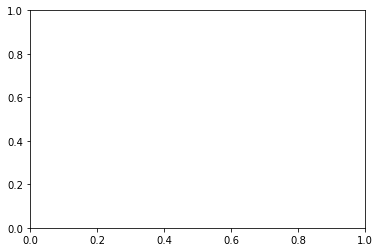

In [117]:
import matplotlib.pyplot as plt

# Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regr.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()